In [129]:
import pandas as pd
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
import geopandas as gpd
import descartes
from shapely.geometry import Point, Polygon

In [128]:
pip install descartes

You should consider upgrading via the '/Users/emmyzhou/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [125]:
pip install geopandas

     |████████████████████████████████| 962 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 7.4 MB 680 kB/s eta 0:00:01     |███████▍                        | 1.7 MB 3.5 MB/s eta 0:00:02     |██████████████████▏             | 4.2 MB 396 kB/s eta 0:00:09     |███████████████████████         | 5.3 MB 396 kB/s eta 0:00:06
     |████████████████████████████████| 1.0 MB 2.8 MB/s eta 0:00:01
     |████████████████████████████████| 14.8 MB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/Users/emmyzhou/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [47]:
df = pd.read_csv('reviews.csv')

In [130]:
df.head()
df.shape
# df.isna().sum()
# df = df.dropna()
# df.isna().sum()


listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

In [32]:
text = " ".join(review for review in df.comments)

In [33]:
len(text)

261696284

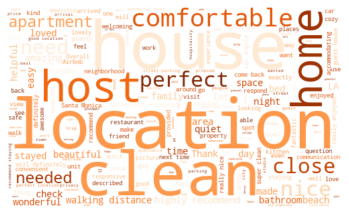

<Figure size 1440x1440 with 0 Axes>

In [44]:
# mask = np.array(Image.open("Airbnbs-colors.png"))

stopwords = set(STOPWORDS)
stopwords.update(["stay", "place", "everything", "great", "room"])

wordcloud = WordCloud(stopwords=stopwords,width=500, height=300, colormap="Oranges", background_color="white").generate(text)



# image_colors = ImageColorGenerator(mask)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

plt.figure(figsize=[20,20])

plt.savefig("LA_review.png", format="png")


In [45]:
wordcloud.to_file("LA_review.png")

In [57]:
LA = pd.read_csv('listings.csv')

In [104]:
print(LA.head().columns)
LA.shape


Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

(30533, 74)

In [62]:
LA.review_scores_communication.dropna().mean()

9.735181767457831

In [67]:
LA.review_scores_location.dropna().mean()

9.712384060460323

In [65]:
LA.review_scores_value.dropna().mean()

9.433946057378458

In [70]:
LA.review_scores_cleanliness.dropna().mean()

9.433672374576199

In [77]:
LA.review_scores_accuracy.dropna().mean()

9.621904639285868

# NYC Data

In [71]:
nyc = pd.read_csv('nyclistings.csv')

In [73]:
nyc.review_scores_communication.dropna().mean()

9.727498110355253

In [74]:
nyc.review_scores_location.dropna().mean()

9.594190620272315

In [75]:
nyc.review_scores_value.dropna().mean()

9.386070013010196

In [76]:
nyc.review_scores_cleanliness.dropna().mean()

9.268929661759817

In [78]:
nyc.review_scores_accuracy.dropna().mean()

9.599546416691865

In [86]:
newLA = LA[['id','review_scores_communication','review_scores_location','review_scores_value','review_scores_cleanliness']]
newLA = newLA.dropna()

In [90]:
newLA = newLA.sample(n=50, replace = False)

In [91]:
newLA.review_scores_communication.dropna().mean()

9.7

In [94]:
# newLA

In [97]:
LA.property_type.unique()

array(['Entire condominium', 'Private room in apartment',
       'Entire apartment', 'Private room in guesthouse', 'Entire house',
       'Private room in house', 'Entire guesthouse',
       'Private room in loft', 'Room in hotel', 'Entire guest suite',
       'Entire bungalow', 'Private room in townhouse',
       'Private room in island', 'Entire townhouse',
       'Private room in hostel', 'Room in boutique hotel',
       'Private room in bungalow', 'Entire villa', 'Entire cottage',
       'Entire cabin', 'Private room in villa',
       'Private room in farm stay', 'Entire loft', 'Shared room in house',
       'Shared room in hostel', 'Shared room in villa', 'Camper/RV',
       'Farm stay', 'Private room in condominium',
       'Private room in guest suite', 'Entire place',
       'Room in aparthotel', 'Private room in treehouse', 'Treehouse',
       'Shared room in apartment', 'Private room in bed and breakfast',
       'Private room', 'Private room in castle', 'Barn', 'Yurt', 'Boat

In [98]:
LA.room_type.unique()

array(['Entire home/apt', 'Private room', 'Hotel room', 'Shared room'],
      dtype=object)

In [99]:
LA.room_type.isna().sum()

0

In [103]:
LA.groupby('room_type').count()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,19635,19635,19635,19635,19635,19191,13316,19635,19635,19635,...,15289,15283,15281,4236,19635,19635,19635,19635,19635,15594
Hotel room,155,155,155,155,155,148,107,155,155,155,...,137,137,137,82,155,155,155,155,155,137
Private room,9750,9750,9750,9750,9748,9268,6087,9750,9750,9750,...,7296,7292,7291,1565,9750,9750,9750,9750,9750,7482
Shared room,993,993,993,993,993,919,450,993,993,993,...,577,576,575,166,993,993,993,993,993,589


In [105]:
19635/30533

0.643074706055743

In [106]:
155/30533

0.0050764746340025545

In [107]:
9750/30533

0.3193266302033865

In [108]:
993/30533

0.03252218910686798

In [112]:
geoLA = LA[['latitude','longitude']]

,latitude,longitude
0,33.98209,-118.38494
1,34.09768,-118.34602
2,34.00475,-118.48127
3,33.87619,-118.11397
4,33.98750,-118.43200
...,...,...
30528,33.99456,-118.47314
30529,34.10220,-118.34663
30530,34.05945,-118.44134
30531,34.05036,-118.26509


In [119]:
nyc.room_type.isna().sum()
nyc.groupby('room_type').count()
# nyc.shape

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
room_type,,,,,,,,,,,,,,,,,,,,,
Entire home/apt,22860,22860,22860,22860,22852,22438,14721,22860,22860,22860,...,17473,17461,17460,0,22860,22860,22860,22860,22860,17940
Hotel room,388,388,388,388,388,367,218,388,388,388,...,277,277,277,0,388,388,388,388,388,278
Private room,20498,20498,20498,20498,20491,19721,12698,20498,20498,20498,...,14683,14670,14672,0,20498,20498,20498,20498,20498,15270
Shared room,920,920,920,920,919,859,570,920,920,920,...,642,642,642,0,920,920,920,920,920,661


In [120]:
22860/44666

0.5117986835624412

In [121]:
388/44666

0.008686696816370394

In [122]:
20498/44666

0.4589172972730936

In [123]:
920/44666

0.02059732234809475